<a href="https://colab.research.google.com/github/Lashi0812/AppiledAI/blob/master/ch16%20NeuralNetwork/Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [3]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [5]:
type(x)

tensorflow.python.framework.ops.EagerTensor

In [7]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [9]:
x =  tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[ 0.33491892]
 [-1.5929288 ]
 [ 1.3859259 ]], shape=(3, 1), dtype=float32)


In [11]:
x = tf.random.uniform(shape=(3,1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.5404153]
 [0.5229608]
 [0.6160319]], shape=(3, 1), dtype=float32)


Tensors are constant that you cant modify the value ,in numpy you cna modify the value.

In [14]:
x = np.ones(shape=(2,1))
x

array([[1.],
       [1.]])

In [15]:
x[1,0] = 0
x

array([[1.],
       [0.]])

In [16]:
# in tensor you cnat chnage it
x =  tf.ones(shape=(2,3))
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [23]:
x[1,1]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [26]:
try:
    x[1,1] = 0
except TypeError as er:
    print(er)

'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


To modify the state of tensor,we have tensor variables

In [31]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)),
                name="first variable")
type(v)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [32]:
v

<tf.Variable 'first variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.8969163 ],
       [-0.37422216],
       [-0.13398656]], dtype=float32)>

In [33]:
v.assign(tf.ones(shape=(3,1)))
v

<tf.Variable 'first variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [35]:
v[0,0].assign(10.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[10.],
       [ 1.],
       [ 1.]], dtype=float32)>

In [37]:
v.assign_add(tf.ones(shape=(3,1)))
v

<tf.Variable 'first variable:0' shape=(3, 1) dtype=float32, numpy=
array([[11.],
       [ 2.],
       [ 2.]], dtype=float32)>

In [38]:
v.assign_sub(tf.ones(shape=(3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[10.],
       [ 1.],
       [ 1.]], dtype=float32)>

In [40]:
a = tf.ones(shape=(2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

In [41]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [42]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [49]:
# Uisng GradientTape with Constant tensor input
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_const)
gradient = tape.gradient(result,input_const)

In [50]:
type(gradient)

NoneType

In [51]:
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result,input_const)

In [52]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

# A linear classifier in pure TensorFlow

In [110]:
num_sample_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_sample_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_sample_per_class
)
print(negative_samples.shape,positive_samples.shape)
inputs = np.r_[negative_samples,
               positive_samples].astype(np.float32)
inputs.shape

(1000, 2) (1000, 2)


(2000, 2)

In [111]:
inputs.dtype

dtype('float32')

In [112]:
targets = np.r_[np.zeros(shape=(num_sample_per_class,1)),
                np.ones(shape=(num_sample_per_class,1))].astype(np.float32)
targets.shape

(2000, 1)

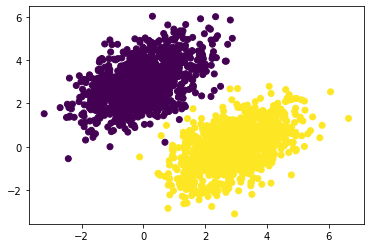

In [113]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets)

In [114]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [115]:
tf.matmul(inputs,W)

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 1.3623483 ],
       [ 1.6325974 ],
       [ 1.3616269 ],
       ...,
       [ 1.7268729 ],
       [ 1.9163978 ],
       [-0.17369187]], dtype=float32)>

In [116]:
def model(inputs):
    return tf.matmul(inputs,W)+b

In [117]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

In [118]:
learning_rate =0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrt_w,grad_loss_wrt_b = tape.gradient(loss,[W,b])
    W.assign_sub(grad_loss_wrt_w*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

In [119]:
for step in range(40):
    loss = training_step(inputs,targets)
    if step%5==0:
        print(f"Loss at step {step} : {loss:.1f}")

Loss at step 0 : 1.7
Loss at step 5 : 0.1
Loss at step 10 : 0.1
Loss at step 15 : 0.1
Loss at step 20 : 0.0
Loss at step 25 : 0.0
Loss at step 30 : 0.0
Loss at step 35 : 0.0


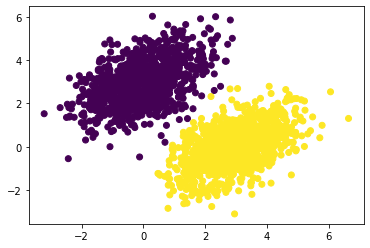

In [120]:
predicitions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predicitions[:,0]>0.5)
plt.show()

In [122]:
W,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.17718157],
        [-0.12055275]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3937666], dtype=float32)>)

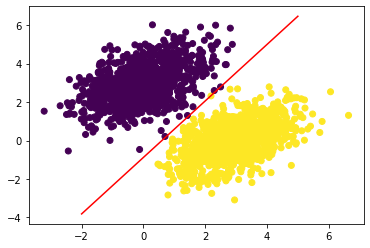

In [124]:
x = np.linspace(-2,5,100)
y = -W[0]/W[1] * x + (0.5-b)/W[1]
plt.scatter(inputs[:,0],inputs[:,1],c=predicitions[:,0]>0.5)
plt.plot(x,y,"-r")
plt.show()


# Anatomy of a neural network

## Layers

1. units - number of neuron in the layer.
1. build method is used to create the weights
2. call method is used feed forword the inputs in the layer.

In [126]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units =units
        self.activation = activation
    
    def build(self,input_shape):
        print("Calling the build method")
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim,self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    def call(self,inputs):
        print("Calling the Call method")
        y = tf.matmul(inputs,self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [128]:
my_dense = SimpleDense(units=32,activation=tf.nn.relu)

In [129]:
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)

Calling the build method
Calling the Call method


In [130]:
output_tensor.shape

TensorShape([2, 32])

In [140]:
from tensorflow.keras import layers
layer = layers.Dense(32,activation="relu")

In [141]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32,activation="relu"),
    layers.Dense(32)
])

In [152]:
model = keras.Sequential([
    SimpleDense(32,activation="relu"),
    SimpleDense(64,activation="relu"),
    SimpleDense(32,activation="relu"),
    SimpleDense(10,activation="softmax")
])

after creating the network topology we need to complie the model
1. Optimiser
2. loss
3. metrices

In [153]:
model = keras.Sequential([keras.layers.Dense(1)])
# we can complie using string 
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [147]:
# we can also complie the model direct using the python object
model.compile(optimizer =keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=keras.metrics.BinaryAccuracy())

# Understanding the fit() method:

model----->Compile ----> Fit

Some key arguments
1. data (inputs, targets)
2. epochs
3. batch_size


fit method return the `history` objects.

In [149]:
history = model.fit(inputs,targets,epochs=5,batch_size=128)
type(history)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 7.0123 - binary_accuracy: 0.6155
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 6.6857 - binary_accuracy: 0.6195
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 6.3695 - binary_accuracy: 0.6250
Epoch 4/5
16/16 [==============================] - 0s 5ms/step - loss: 6.0601 - binary_accuracy: 0.6310
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 5.7601 - binary_accuracy: 0.6350


keras.callbacks.History

In [151]:
history.history

{'loss': [7.012332916259766,
  6.685675144195557,
  6.36945104598999,
  6.06012487411499,
  5.760125637054443],
 'binary_accuracy': [0.6154999732971191,
  0.6194999814033508,
  0.625,
  0.6309999823570251,
  0.6349999904632568]}

## Monitoring Loss and Metrics on Validation Data

In [156]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=keras.metrics.BinaryAccuracy())

In [162]:
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

history = model.fit(x=training_inputs,
          y=training_targets,
          epochs=5,
          batch_size=128,
          validation_data =(val_inputs,val_targets))

Epoch 1/5
11/11 [==============================] - 0s 13ms/step - loss: 0.0606 - binary_accuracy: 0.9693 - val_loss: 0.0602 - val_binary_accuracy: 0.9683
Epoch 2/5
11/11 [==============================] - 0s 6ms/step - loss: 0.0818 - binary_accuracy: 0.9514 - val_loss: 0.0688 - val_binary_accuracy: 0.9533
Epoch 3/5
11/11 [==============================] - 0s 8ms/step - loss: 0.0675 - binary_accuracy: 0.9671 - val_loss: 0.0538 - val_binary_accuracy: 0.9767
Epoch 4/5
11/11 [==============================] - 0s 7ms/step - loss: 0.0676 - binary_accuracy: 0.9636 - val_loss: 0.0579 - val_binary_accuracy: 0.9817
Epoch 5/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0621 - binary_accuracy: 0.9686 - val_loss: 0.0245 - val_binary_accuracy: 0.9983


In [164]:
history.history

{'loss': [0.060615990310907364,
  0.08179737627506256,
  0.06753044575452805,
  0.06758499890565872,
  0.06209738180041313],
 'binary_accuracy': [0.9692857265472412,
  0.9514285922050476,
  0.9671428799629211,
  0.9635714292526245,
  0.9685714244842529],
 'val_loss': [0.06015975773334503,
  0.0688355565071106,
  0.05376467481255531,
  0.05787220597267151,
  0.024479812011122704],
 'val_binary_accuracy': [0.9683333039283752,
  0.95333331823349,
  0.9766666889190674,
  0.9816666841506958,
  0.9983333349227905]}

In [165]:
# you can also perform the validation after the model fit
loss_and_metrics = model.evaluate(val_inputs,val_targets,batch_size=128)

5/5 [==============================] - 0s 5ms/step - loss: 0.0245 - binary_accuracy: 0.9983


In [166]:
loss_and_metrics

[0.024479812011122704, 0.9983333349227905]

# Inference

In [167]:
# we directly use the model.__call__ method ,but if the prediction datset is large then there,
# because theres is no bacth size
predictions = model(val_inputs)

In [168]:
# we can use the predict method
predictions = model.predict(val_inputs,batch_size=128)

5/5 [==============================] - 0s 3ms/step
